In [2]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt 
import random
import copy  # array-copying convenience
import sys  # max float
from typing import Tuple, List, Dict
%matplotlib inline

In [3]:
Graph = np.array([                           
     [ False, True, False, False, False, False, False, False],
     [ True, False, True, False, False, False, False, True],
     [ False, True, False, True, False, False, False, False],
     [ False, False, True, False, True, False, False, False],
     [ False, False, False, True, False, True, True, False],
     [ False, False, False, False, True, False, False, False],
     [ False, False, False, False, True, False, False, True],
     [ False, True, False, False, False, False, True, False],
])
Soluce = np.array([0, 1, 0, 1, 0, 1, 1, 0])

In [4]:
def from_file(file_path)-> np.ndarray:
        with open(file_path) as f:
            line = f.readline()
            while line[0] != "p":
                line = f.readline()
            n = int(line.split()[2])
            adj_mat = []
            for i in range(0,n):
                adj_mat.append([False]*n)
            for line in f:
                if line[0] == "e":
                    w, v = map(int, line.split()[1:])
                    adj_mat[w-1][v-1] = adj_mat[v-1][w-1] = True
        return np.array(adj_mat)

In [5]:
#Ecrire la solution dans un fichier 
def to_file(file_path , Soluce , temps , XG):                                                                   
  with open(file_path,"w") as f:
    f.write( "# Solution pour le Graph du fichier "+file_path+"\n" )
    f.write( "Minimum number of colors used : " + str(XG) + "\n" )
    f.write( "Temps execution :: "+ str(temps) + "\n" )
    f.write( "Color Affectation to the nodes : \n")
    [f.write( "Node "+ str(i)+ " :: "+str(Soluce[i]) +"\n") for i in range(0,len(Soluce))]
  return

In [6]:
#Les Adjacents d'un Noeud
def Adjacents(Graph,i):
    Adj = []
    [Adj.append(j) if Graph[i][j] else None for j in range(0,len(Graph))]
    return Adj
Adjacents(Graph,1)

[0, 2, 7]

In [199]:
def nb_conflits(G: np.ndarray, soluce: np.ndarray)-> int:
    nb = 0
    if(soluce.shape[0] < G.shape[0]):
        print("Problem : ",G.shape[0] ,",G.shape[0] ",soluce.shape[0])
    for i in range(G.shape[0]):
        for j in range(i):
            if(G[i][j] and soluce[i] == soluce[j]):
                nb = nb + 1
    return nb


In [8]:
def Couleurs(Soluce : np.ndarray)-> Tuple[np.ndarray, int] :
    couleurs = np.unique(Soluce)
    return couleurs
Couleurs(Soluce)

array([0, 1])

In [9]:
def random_Soluce(Graph : np.ndarray )-> np.ndarray:
    Soluce = []
    for i in range(len(Graph)):
        Soluce.append(random.random()*len(Graph))
    return np.array(Soluce)
s = random_Soluce(Graph)    

In [10]:
def fitness_colors(Graph : np.ndarray, Soluce : np.ndarray,poid_conflits: float = 1.)->  int:
    round_Soluce = np.fix(Soluce)
    nb_colors = len(Couleurs(round_Soluce))
    nb_conflit = nb_conflits(Graph , round_Soluce)
    return nb_colors + nb_conflit*poid_conflits
s = random_Soluce(Graph)  
s,fitness_colors(Graph,s)


In [32]:
#Dictionnaire de couleurs pour recherche local
def count_couleurs(Soluce):
    count_color = {}
    for color in Soluce:
        if color in count_color.keys():
            count_color[color]+=1
        else :
            count_color[color] = 1
    return count_color

In [33]:
#Affecter la couleur dans la recherche local
def affecter_couleur(Graph,Soluce,count_couleur,noeud):
    Adjs = Adjacents(Graph,noeud)
    cpt_col = 0
    choix_col = Soluce[noeud]
    nbc = len(count_couleur.keys())
    for color in count_couleur.keys():#pour chaque couleur
        #Verifier s'il n y a pas de noeud adjacents avec cette couleur
        possible = True
        for adj in Adjs:
            if color == Soluce[adj]:
                possible = False
                break
        if possible : #Si on peut affecter la couleur
            if count_couleur[color] > cpt_col:
                choix_col = color
                cpt_col = count_couleur[color]
    #Affecter la couleur au noeud
    old_col = Soluce[noeud]
    count_couleur[ Soluce[noeud] ]-=1
    Soluce[noeud] = choix_col
    count_couleur[choix_col]+=1
    if count_couleur[ old_col ]  == 0 :
        count_couleur.pop(old_col)
    return Soluce,count_couleur

In [39]:
#Recherche_locale
def local_search(Graph,init_Soluce,max_stagnation,max_iter):
    count_color = count_couleurs(init_Soluce)
    V = len(Graph)
    Soluce = init_Soluce
    count_couleur = count_couleurs(init_Soluce)
    nbc = len(count_couleur.keys())
    stagnation = 0
    for i in range(0,max_iter):
        stagnation = stagnation + 1
        noeud = random.randint(0, V - 1)
        Soluce , count_couleur = affecter_couleur(Graph,Soluce,count_couleur,noeud)
        new_nbc = len(count_couleur.keys())
        if new_nbc < nbc :
            stagnation = 0
            nbc = new_nbc
        else :
            stagnation = stagnation + 1
            if stagnation >= max_stagnation:
                for noeud in range(0,V):
                    Soluce , count_couleur = affecter_couleur(Graph,Soluce,count_couleur,noeud)
                    new_nbc = len(count_couleur.keys())
                return Soluce,new_nbc
    return Soluce,nbc
local_search(Graph,[i for i in range(len(Graph))] , 3 , 200)

([0, 1, 2, 3, 4, 3, 4, 7, 0, 2, 7, 0, 3, 4, 1, 2, 16, 1, 7, 0, 1, 3, 0, 2, 16],
 7)

In [50]:
def proc_VNS(Graph , init_Soluce , max_stagnation , max_iter):
    count_couleur = count_couleurs(init_Soluce)
    best_soluce = init_Soluce
    best_fitness = len(count_couleur.keys())
    V = len(Graph)
    for Iter in range(max_iter):
        count_coleur = count_couleurs(init_Soluce)
        fitness =  len(count_couleur.keys())
        Soluce = init_Soluce
        k = 1
        while (k <= max_stagnation):
            noeud = random.randint(0, V - 1)
            new_Soluce , count_couleur = affecter_couleur(Graph,Soluce,count_couleur,noeud)
            new_fitness = len(count_couleur.keys())
            if new_fitness < fitness:
                fitness = new_fitness
                k = 1
                Soluce = new_Soluce
                if(fitness < best_fitness):
                    best_fitness = fitness
                    best_soluce = Soluce
            else :
                k = k + 1
    return np.array(best_soluce), best_fitness
proc_VNS (Graph,[i for i in range(len(Graph))] , 3 , 50)    

(array([0, 1, 2, 3, 4, 2, 3, 4, 0, 1, 4, 0, 5, 2, 3, 9, 2, 3, 1, 0, 1, 5,
        0, 4, 2]),
 7)

In [31]:
# whale class
class whale:
    def __init__(self, fitness, dim, minx, maxx, seed,graphe,weight):
        self.weight_conflit = weight
        self.graphe = graphe
        self.rnd = random.Random(seed)
        self.position = [0.0 for i in range(dim)]
        for i in range(dim):
            self.position[i] = ((maxx - minx) * self.rnd.random() + minx)
 
        self.fitness = fitness(graphe,self.position,self.weight_conflit)  # curr fitness


In [86]:
# whale optimization algorithm(WOA)
def woa(fitness, max_iter, n, dim, minx, maxx,graphe,weight):
    rnd = random.Random(0)
 
    # create n random whales
    whalePopulation = [whale(fitness, dim, minx, maxx, i,graphe,weight) for i in range(n)]
 
    # compute the value of best_position and best_fitness in the whale Population
    Xbest = [0.0 for i in range(dim)]
    Fbest = sys.float_info.max
 
    for i in range(n):  # check each whale
        if whalePopulation[i].fitness < Fbest:
            Fbest = whalePopulation[i].fitness
            Xbest = copy.copy(whalePopulation[i].position)
 
    # main loop of woa
    Iter = 0
    while Iter < max_iter:
 
        # after every 10 iterations
        # print iteration number and best fitness value so far
        if Iter % max_iter - 1 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.3f" % Fbest)
 
        # linearly decreased from 2 to 0
        a = 2 * (1 - Iter / max_iter)
        a2=-1+Iter*((-1)/max_iter)
 
        for i in range(n):
            A = 2 * a * rnd.random() - a
            C = 2 * rnd.random()
            b = 1
            l = (a2-1)*rnd.random()+1;
            p = rnd.random()
         
            D = [0.0 for i in range(dim)]
            D1 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]
            Xrand = [0.0 for i in range(dim)]
            wi = math.exp(Iter / (max_iter - 1))
            if p < 0.5:
                if abs(A) > 1:
                    for j in range(dim):
                        D[j] = abs(C * Xbest[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xbest[j] - wi * A * D[j]
                else:
                    p = random.randint(0, n - 1)
                    while (p == i):
                        p = random.randint(0, n - 1)
 
                    Xrand = whalePopulation[p].position
 
                    for j in range(dim):
                        D[j] = abs(C * Xrand[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xrand[j] - wi * A * D[j]
            else:
                for j in range(dim):
                    D1[j] = abs(Xbest[j] - whalePopulation[i].position[j])
                    Xnew[j] = wi * D1[j] * math.exp(b * l) * math.cos(2 * math.pi * l) + Xbest[j]
 
            for j in range(dim):
                whalePopulation[i].position[j] = Xnew[j]
 
        for i in range(n):
            # if Xnew < minx OR Xnew > maxx
            # then clip it
            for j in range(dim):
                whalePopulation[i].position[j] = max(whalePopulation[i].position[j], minx)
                whalePopulation[i].position[j] = min(whalePopulation[i].position[j], maxx)
 
            whalePopulation[i].fitness = fitness(whalePopulation[i].graphe,whalePopulation[i].position,whalePopulation[i].weight_conflit )
 
            if (whalePopulation[i].fitness < Fbest):
                Xbest = copy.copy(whalePopulation[i].position)
                Fbest = whalePopulation[i].fitness
 
 
        Iter += 1
    # end-while
 
    # returning the best solution
    return Xbest,Fbest

In [200]:

# Variable neighbourhood search Disturbed Whale Optimization algorithm(VDWOA)
def vdwoa(fitness, max_iter, n, dim, minx, maxx,graphe,weight=1,epsilon=0.5,vns_stagnation=3,vns_iteration=50):
    rnd = random.Random(0)
 
    # create n random whales
    whalePopulation = [whale(fitness, dim, minx, maxx, i,graphe,weight) for i in range(n)]
 
    # compute the value of best_position and best_fitness in the whale Population
    Xbest = [0.0 for i in range(dim)]
    Fbest = sys.float_info.max
 
    for i in range(n):  # check each whale
        if whalePopulation[i].fitness < Fbest:
            Fbest = whalePopulation[i].fitness
            Xbest = copy.copy(whalePopulation[i].position)
 
    # main loop of woa
    Iter = 0
    while Iter < max_iter:
 
        # after every 10 iterations
        # print iteration number and best fitness value so far
        if Iter % 50 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = ", Fbest)
 
        # linearly decreased from 2 to 0
        a = 2 * (1 - Iter / max_iter)
        a2=-1+Iter*((-1)/max_iter)
 
        for i in range(n):
            r = rnd.random()
            A = 2 * a * rnd.random() - a
            C = 2 * rnd.random()
            b = 1
            l = (a2-1)*rnd.random()+1;
            p = rnd.random()
            D = [0.0 for i in range(dim)]
            D1 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]
            Xrand = [0.0 for i in range(dim)]
            wi = math.exp(Iter / (max_iter - 1))
            if p < 0.5:
                if abs(A) < 1:
                    for j in range(dim):
                        D[j] = abs(C * Xbest[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xbest[j] - wi * A * D[j]
                else: # |A| <= 1
                    if r < 0.5:
                        # eq 15 : X(t+1) = X_best + epsilon * normal_distr_N(0,1) * wi
                        delta = np.random.normal(0, 1, dim)
                        for j in range(dim):
                            Xnew[j] = Xbest[j] + epsilon* delta[j] * wi
                            if Xnew[j] < 0.:
                                #print("Xnew < 0")
                                Xnew[j] = 0.
                            else:
                                if Xnew[j] >= dim:
                                    #print("Xnew >= dim = ",dim)
                                    Xnew[j] = dim - 1
                    else :
                        # eq 12 :  X(t+1) = Xrand - wi * A * D
                        p = random.randint(0, n - 1)
                        while (p == i):
                            p = random.randint(0, n - 1)
                        Xrand = whalePopulation[p].position
                        for j in range(dim):
                            D[j] = abs(C * Xrand[j] - whalePopulation[i].position[j])
                            Xnew[j] = Xrand[j] - wi * A * D[j]
                    if r > 0.5 : 
                        #Update the local optimal solution
                        Xnew = proc_VNS(graphe , np.fix(Xnew) , vns_stagnation , vns_iteration)[0]
                        
            else: # p > 0.5
                if r < 0.5 :
                    # eq 15 : X(t+1) = X_best + epsilon * normal_distr_N(0,1) * wi
                    delta = np.random.normal(0, 1, dim)
                    for j in range(dim):
                        Xnew[j] = Xbest[j] + epsilon* delta[j] * wi
                        if Xnew[j] < 0.:
                        #   print("Xnew < 0")
                            Xnew[j] = 0.
                        else:
                            if Xnew[j] >= dim:
                        #        print("Xnew >= dim = ",dim)
                                Xnew[j] = dim - 1
                else : 
                    for j in range(dim):
                        D1[j] = abs(Xbest[j] - whalePopulation[i].position[j])
                        Xnew[j] = wi * D1[j] * math.exp(b * l) * math.cos(2 * math.pi * l) + Xbest[j]
                if r > 0.5 : 
                    Xnew = proc_VNS(graphe , np.fix(Xnew) , vns_stagnation , vns_iteration)[0]
                    #Xbest,Fbest = proc_VNS(graphe , np.fix(Xbest) , 3 , 100)
                    
 
            for j in range(dim):
                whalePopulation[i].position[j] = Xnew[j]
 
        for i in range(n):
            # if Xnew < minx OR Xnew > maxx
            # then clip it
            for j in range(dim):
                whalePopulation[i].position[j] = max(whalePopulation[i].position[j], minx)
                whalePopulation[i].position[j] = min(whalePopulation[i].position[j], maxx)
 
            whalePopulation[i].fitness = fitness(whalePopulation[i].graphe,whalePopulation[i].position,whalePopulation[i].weight_conflit )
 
            if (whalePopulation[i].fitness < Fbest):
                Xbest = copy.copy(whalePopulation[i].position)
                Fbest = whalePopulation[i].fitness
 
 
        Iter += 1
    # end-while
 
    # returning the best solution
    return Xbest,Fbest

In [202]:
# Driver code for coloring graph
Graph = from_file("queen7_7.col")
print("\nBegin whale optimization algorithm on Graph Coloring\n")
dim = len(Graph)
fitness = fitness_colors
 
print("Goal is to minimize Chromatic number of a graphe with " + str(dim) + " nodes")
print("XG of Graphe is  2")
 
num_whales = 50
max_iter = 500

print("Setting num_whales = " + str(num_whales))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting WOA algorithm\n")
 
best_position = vdwoa(fitness, max_iter, num_whales, dim, 0, dim,Graph,len(Graph),0.5,5,50)[0]
Soluce = best_position
if (nb_conflits(Graph,np.fix(best_position)) > 0) :
    print("Solution obtenu a des conflits : if faut la reparer")
print("\nWOA completed\n")
print("\nBest solution found:")
print(["%d" % int(best_position[k]) for k in range(dim)])
err = fitness(Graph,best_position,1)
print("fitness of best solution = ",int(err))
 
print("\nEnd WOA for Graphe coloring\n")


Begin whale optimization algorithm on Graph Coloring

Goal is to minimize Chromatic number of a graphe with 49 nodes
XG of Graphe is  2
Setting num_whales = 50
Setting max_iter    = 500

Starting WOA algorithm

Iter = 50 best fitness =  7
Iter = 100 best fitness =  7
Iter = 150 best fitness =  7
Iter = 200 best fitness =  7
Iter = 250 best fitness =  7
Iter = 300 best fitness =  7
Iter = 350 best fitness =  7
Iter = 400 best fitness =  7
Iter = 450 best fitness =  7

WOA completed


Best solution found:
['32', '22', '12', '26', '9', '25', '0', '25', '0', '32', '22', '12', '26', '9', '26', '9', '25', '0', '32', '22', '12', '22', '12', '26', '9', '25', '0', '32', '0', '32', '22', '12', '26', '9', '25', '9', '25', '0', '32', '22', '12', '26', '12', '26', '9', '25', '0', '32', '22']
fitness of best solution =  7

End WOA for Graphe coloring



In [193]:
# Driver code for coloring graph
Graph = from_file("myciel5.col")
print("\nBegin whale optimization algorithm on Graph Coloring Version 2 \n")
dim = len(Graph)
fitness = fitness_colors
 
print("Goal is to minimize Chromatic number of a graphe with " + str(dim) + " nodes")
print("XG of Graphe is  2")
 
num_whales = 250
max_iter = 500
 
print("Setting num_whales = " + str(num_whales))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting WOA algorithm\n")
 
best_position = woa(fitness, max_iter, num_whales, dim, 0, dim,Graph,len(Graph))[0]

print("Solution obtenu a des conflits : ",nb_conflits(Graph,np.fix(best_position)))
print("\nWOA completed\n")
print("\nBest solution found:")
print(["%d" % int(best_position[k]) for k in range(dim)])
err = fitness(Graph,best_position,1)
print("fitness of best solution = ",int(err))
 
print("\nEnd WOA for Graphe coloring\n")


Begin whale optimization algorithm on Graph Coloring Version 2 

Goal is to minimize Chromatic number of a graphe with 47 nodes
XG of Graphe is  2
Setting num_whales = 250
Setting max_iter    = 500

Starting WOA algorithm

Solution obtenu a des conflits :  0

WOA completed


Best solution found:
['16', '25', '24', '1', '29', '24', '13', '5', '21', '3', '11', '30', '27', '31', '17', '17', '0', '15', '30', '1', '30', '25', '24', '23', '21', '23', '23', '18', '18', '26', '19', '5', '21', '29', '22', '15', '31', '23', '11', '27', '30', '27', '31', '13', '19', '26', '25']
fitness of best solution =  21

End WOA for Graphe coloring



In [112]:
num_whales = 75
max_iter = 300
fitness = fitness_colors


# Prepare data for plot
graphes = ["myciel3.col","myciel4.col","myciel5.col","myciel6.col","myciel7.col","queen5_5.col","queen6_6.col","queen7_7.col"]
optimal = np.array([4,5,6,7,8,5,7])
data = [["Graphe","Optimal Solution","WOA Solution","WOA Conflicts","VDWOA Solution","VDWOA Conflicts"]]
for i in range (len(graphes)):
    
    row = [graphes[i] , optimal[i]]
    #woa Solution
    G = from_file(graphes[i])
    dim = G.shape[0]
    print("Begin : ",graphes[i]," Len(G) = ",G.shape[0]," dim ",dim)
    best_position,best_fitness = woa(fitness, max_iter, num_whales, dim, 0, G.shape[0],G,G.shape[0])
    row.append(best_fitness)
    print("WOA , fitness len : ",len(best_position))
    row.append(nb_conflits(G,np.fix(best_position)))
    best_position,best_fitness = vdwoa(fitness, max_iter, num_whales, dim, 0, dim,G,len(G))
    print("VDWOA , fitness len : ",len(best_position))
    row.append(best_fitness)
    row.append(nb_conflits(G,np.fix(best_position)))
    data.append(row)
df = np.array(data)
df

Begin :  myciel3.col  Len(G) =  11  dim  11
WOA , fitness len :  11
VDWOA , fitness len :  11
Begin :  myciel4.col  Len(G) =  23  dim  23
WOA , fitness len :  23
VDWOA , fitness len :  23
Begin :  myciel5.col  Len(G) =  47  dim  47
WOA , fitness len :  47
VDWOA , fitness len :  47
Begin :  myciel6.col  Len(G) =  95  dim  95
WOA , fitness len :  95
VDWOA , fitness len :  95
Begin :  myciel7.col  Len(G) =  191  dim  191
WOA , fitness len :  191
VDWOA , fitness len :  191
Begin :  queen5_5.col  Len(G) =  25  dim  25
WOA , fitness len :  25
VDWOA , fitness len :  25
Begin :  queen6_6.col  Len(G) =  36  dim  36
WOA , fitness len :  36
VDWOA , fitness len :  36


C:\Users\user\AppData\Local\Temp\ipykernel_15516\428606870.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.array(data)


array(['Graphe', 'Optimal Solution', 'WOA Solution', 'WOA Conflicts',
       'VDWOA Solution', 'VDWOA Conflicts',
       list(['myciel3.col', 4, 4, 0, 4, 0]),
       list(['myciel4.col', 5, 11, 0, 5, 0]),
       list(['myciel5.col', 6, 23, 0, 6, 0]),
       list(['myciel6.col', 7, 53, 0, 7, 0]),
       list(['myciel7.col', 8, 122, 0, 8, 0]),
       list(['queen5_5.col', 5, 13, 0, 5, 0]),
       list(['queen6_6.col', 7, 23, 0, 8, 0])], dtype=object)

In [175]:
data
df = data[6:]
labels = data[:6]
df_array = np.array(df)

only_data = []
for i in range(len(df)):
    row = []
    for j in range(1,len(df[i])):
        row.append(df[i][j])
    only_data.append(row)
np_data = np.array(only_data)
np_data,np_data[:,3]
np_data.shape[1]

5

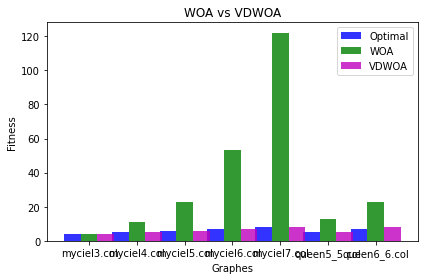

In [180]:


# data to plot
n_groups = np_data.shape[0]
optimal_soluces = np_data[:,0]
woa_soluce = np_data[:,1]
vdwoa_soluce = np_data[:,3]
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, optimal_soluces, bar_width,
alpha=opacity,
color='b',
label='Optimal')

rects2 = plt.bar(index + bar_width, woa_soluce, bar_width,
alpha=opacity,
color='g',
label='WOA')

rects3 = plt.bar(index + 2*bar_width, vdwoa_soluce, bar_width,
alpha=opacity,
color='m',
label='VDWOA')

plt.xlabel('Graphes')
plt.ylabel('Fitness')
plt.title('WOA vs VDWOA')
plt.xticks(index + bar_width, graphes)
plt.legend()

plt.tight_layout()
plt.show()